In [76]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(42)
random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [77]:
def generate_synthetic_dataset(n_samples=1000, n_features=20, n_classes=5):
    X = []
    y = []

    samples_per_class = n_samples // n_classes

    for class_id in range(n_classes):
        mean = np.random.randn(n_features) * 3 + class_id * 2
        cov = np.eye(n_features) * (0.5 + class_id * 0.2)

        class_samples = np.random.multivariate_normal(mean, cov, samples_per_class)
        X.append(class_samples)
        y.extend([class_id] * samples_per_class)

    X = np.vstack(X)
    y = np.array(y)

    # Shuffle the dataset
    indices = np.random.permutation(len(y))
    X = X[indices]
    y = y[indices]

    return X, y


def train_test_split(X, y, test_size=0.2):
    n_samples = len(y)
    n_test = int(n_samples * test_size)

    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

print("Dataset generation functions defined!")


Dataset generation functions defined!


In [78]:
def sigmoid(z):
    """Sigmoid activation function: σ(z) = 1 / (1 + e^(-z))"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))


def sigmoid_derivative(z):
    """Derivative of sigmoid: σ'(z) = σ(z) * (1 - σ(z))"""
    s = sigmoid(z)
    return s * (1 - s)


def relu(z):
    """ReLU activation function: f(z) = max(0, z)"""
    return np.maximum(0, z)


def relu_derivative(z):
    """Derivative of ReLU: f'(z) = 1 if z > 0, else 0"""
    return (z > 0).astype(float)


def softmax(z):
    """
    Softmax activation for output layer (multi-class classification).
    softmax(z_i) = e^(z_i) / Σ(e^(z_j))
    """
    # Subtract max for numerical stability
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

print("Activation functions defined!")


Activation functions defined!


In [79]:
class ThreeHiddenLayerNN:
    """
    Three Hidden Layer Neural Network for Multi-Class Classification.

    Architecture:
    Input Layer -> Hidden Layer 1 -> Hidden Layer 2 -> Hidden Layer 3 -> Output Layer

    Activation Functions:
    - Hidden Layers: ReLU
    - Output Layer: Softmax

    Loss Function: Cross-Entropy Loss
    """

    def __init__(self, input_size, hidden1_size, hidden2_size, hidden3_size,
                 output_size, learning_rate=0.01):
        """
        Initialize the neural network with random weights and biases.

        Parameters:
        - input_size: Number of input features
        - hidden1_size: Number of neurons in first hidden layer
        - hidden2_size: Number of neurons in second hidden layer
        - hidden3_size: Number of neurons in third hidden layer
        - output_size: Number of output classes (5 for this assignment)
        - learning_rate: Learning rate for gradient descent
        """
        self.learning_rate = learning_rate

        # Initialize weights using He initialization for ReLU
        # W1: Input to Hidden Layer 1
        self.W1 = np.random.randn(input_size, hidden1_size) * np.sqrt(2.0 / input_size)
        self.b1 = np.zeros((1, hidden1_size))

        # W2: Hidden Layer 1 to Hidden Layer 2
        self.W2 = np.random.randn(hidden1_size, hidden2_size) * np.sqrt(2.0 / hidden1_size)
        self.b2 = np.zeros((1, hidden2_size))

        # W3: Hidden Layer 2 to Hidden Layer 3
        self.W3 = np.random.randn(hidden2_size, hidden3_size) * np.sqrt(2.0 / hidden2_size)
        self.b3 = np.zeros((1, hidden3_size))

        # W4: Hidden Layer 3 to Output Layer
        self.W4 = np.random.randn(hidden3_size, output_size) * np.sqrt(2.0 / hidden3_size)
        self.b4 = np.zeros((1, output_size))

        # Store training history
        self.loss_history = []
        self.accuracy_history = []

print("Neural Network class initialization defined!")


Neural Network class initialization defined!


In [80]:
def forward_propagation(self, X):
    """
    Forward propagation through the network.

    Parameters:
    - X: Input data of shape (batch_size, input_size)

    Returns:
    - output: Network predictions
    - cache: Dictionary containing intermediate values for backpropagation
    """
    # Hidden Layer 1: z1 = X·W1 + b1, a1 = ReLU(z1)
    z1 = np.dot(X, self.W1) + self.b1
    a1 = relu(z1)

    # Hidden Layer 2: z2 = a1·W2 + b2, a2 = ReLU(z2)
    z2 = np.dot(a1, self.W2) + self.b2
    a2 = relu(z2)

    # Hidden Layer 3: z3 = a2·W3 + b3, a3 = ReLU(z3)
    z3 = np.dot(a2, self.W3) + self.b3
    a3 = relu(z3)

    # Output Layer: z4 = a3·W4 + b4, output = Softmax(z4)
    z4 = np.dot(a3, self.W4) + self.b4
    output = softmax(z4)

    # Cache intermediate values for backpropagation
    cache = {
        'X': X, 'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2,
        'z3': z3, 'a3': a3, 'z4': z4, 'output': output
    }

    return output, cache

# Add method to class
ThreeHiddenLayerNN.forward_propagation = forward_propagation

print("Forward propagation method added!")

Forward propagation method added!


In [81]:
def compute_loss(self, y_true, y_pred):
    """
    Compute cross-entropy loss for multi-class classification.

    Loss = -Σ(y_true * log(y_pred)) / n_samples

    Parameters:
    - y_true: One-hot encoded true labels
    - y_pred: Predicted probabilities from softmax

    Returns:
    - loss: Scalar loss value
    """
    n_samples = y_true.shape[0]
    # Add small epsilon to prevent log(0)
    loss = -np.sum(y_true * np.log(y_pred + 1e-8)) / n_samples
    return loss

# Add method to class
ThreeHiddenLayerNN.compute_loss = compute_loss

print("Loss function method added!")

Loss function method added!


In [82]:
def backward_propagation(self, cache, y_true):
    """
    Backward propagation to compute gradients.

    Uses chain rule to compute gradients of loss with respect to weights and biases.

    Parameters:
    - cache: Dictionary containing forward propagation values
    - y_true: One-hot encoded true labels

    Returns:
    - gradients: Dictionary containing gradients for all parameters
    """
    n_samples = y_true.shape[0]

    # Extract cached values
    X = cache['X']
    a1 = cache['a1']
    a2 = cache['a2']
    a3 = cache['a3']
    z1 = cache['z1']
    z2 = cache['z2']
    z3 = cache['z3']
    output = cache['output']

    # Output layer gradient: dz4 = output - y_true (derivative of softmax + cross-entropy)
    dz4 = output - y_true
    dW4 = np.dot(a3.T, dz4) / n_samples
    db4 = np.sum(dz4, axis=0, keepdims=True) / n_samples

    # Hidden Layer 3 gradients
    da3 = np.dot(dz4, self.W4.T)
    dz3 = da3 * relu_derivative(z3)
    dW3 = np.dot(a2.T, dz3) / n_samples
    db3 = np.sum(dz3, axis=0, keepdims=True) / n_samples

    # Hidden Layer 2 gradients
    da2 = np.dot(dz3, self.W3.T)
    dz2 = da2 * relu_derivative(z2)
    dW2 = np.dot(a1.T, dz2) / n_samples
    db2 = np.sum(dz2, axis=0, keepdims=True) / n_samples

    # Hidden Layer 1 gradients
    da1 = np.dot(dz2, self.W2.T)
    dz1 = da1 * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / n_samples
    db1 = np.sum(dz1, axis=0, keepdims=True) / n_samples

    gradients = {
        'dW1': dW1, 'db1': db1,
        'dW2': dW2, 'db2': db2,
        'dW3': dW3, 'db3': db3,
        'dW4': dW4, 'db4': db4
    }

    return gradients

# Add method to class
ThreeHiddenLayerNN.backward_propagation = backward_propagation

print("Backward propagation method added!")

Backward propagation method added!


In [83]:
def update_parameters(self, gradients):
    """
    Update network parameters using gradient descent.

    θ = θ - α * ∇θ

    Parameters:
    - gradients: Dictionary containing gradients for all parameters
    """
    self.W1 -= self.learning_rate * gradients['dW1']
    self.b1 -= self.learning_rate * gradients['db1']
    self.W2 -= self.learning_rate * gradients['dW2']
    self.b2 -= self.learning_rate * gradients['db2']
    self.W3 -= self.learning_rate * gradients['dW3']
    self.b3 -= self.learning_rate * gradients['db3']
    self.W4 -= self.learning_rate * gradients['dW4']
    self.b4 -= self.learning_rate * gradients['db4']

# Add method to class
ThreeHiddenLayerNN.update_parameters = update_parameters

print("Parameter update method added!")

Parameter update method added!


In [84]:
def train(self, X_train, y_train, epochs=1000, batch_size=32, verbose=True):
    """
    Train the neural network using mini-batch gradient descent.

    Parameters:
    - X_train: Training features
    - y_train: Training labels (not one-hot encoded)
    - epochs: Number of training epochs
    - batch_size: Size of mini-batches
    - verbose: Whether to print training progress
    """
    n_samples = X_train.shape[0]
    n_classes = len(np.unique(y_train))

    # Convert labels to one-hot encoding
    y_train_onehot = np.eye(n_classes)[y_train]

    for epoch in tqdm(range(epochs), desc="Training", disable=not verbose):
        # Shuffle data at the beginning of each epoch
        indices = np.random.permutation(n_samples)
        X_shuffled = X_train[indices]
        y_shuffled = y_train_onehot[indices]

        epoch_loss = 0
        n_batches = 0

        # Mini-batch gradient descent
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Forward propagation
            output, cache = self.forward_propagation(X_batch)

            # Compute loss
            loss = self.compute_loss(y_batch, output)
            epoch_loss += loss
            n_batches += 1

            # Backward propagation
            gradients = self.backward_propagation(cache, y_batch)

            # Update parameters
            self.update_parameters(gradients)

        # Calculate average loss for the epoch
        avg_loss = epoch_loss / n_batches
        self.loss_history.append(avg_loss)

        # Calculate training accuracy
        train_pred = self.predict(X_train)
        train_acc = np.mean(train_pred == y_train)
        self.accuracy_history.append(train_acc)

        if verbose and (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {train_acc:.4f}")

# Add method to class
ThreeHiddenLayerNN.train = train

print("Training method added!")

Training method added!


In [85]:
def predict(self, X):
    """
    Make predictions on new data.

    Parameters:
    - X: Input features

    Returns:
    - predictions: Predicted class labels
    """
    output, _ = self.forward_propagation(X)
    predictions = np.argmax(output, axis=1)
    return predictions


def predict_proba(self, X):
    """
    Get prediction probabilities for each class.

    Parameters:
    - X: Input features

    Returns:
    - probabilities: Probability distribution over classes
    """
    output, _ = self.forward_propagation(X)
    return output

# Add methods to class
ThreeHiddenLayerNN.predict = predict
ThreeHiddenLayerNN.predict_proba = predict_proba

print("Prediction methods added!")
print("Neural Network class complete!")

Prediction methods added!
Neural Network class complete!


In [86]:
def compute_confusion_matrix(y_true, y_pred, n_classes):
    """
    Compute confusion matrix for multi-class classification.

    CM[i,j] = number of samples with true class i predicted as class j
    """
    cm = np.zeros((n_classes, n_classes), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    return cm


def compute_metrics(y_true, y_pred, n_classes):
    """
    Compute precision, recall, F1-score for each class.

    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    F1 = 2 * (Precision * Recall) / (Precision + Recall)
    """
    cm = compute_confusion_matrix(y_true, y_pred, n_classes)

    metrics = {}
    for class_id in range(n_classes):
        tp = cm[class_id, class_id]
        fp = np.sum(cm[:, class_id]) - tp
        fn = np.sum(cm[class_id, :]) - tp
        tn = np.sum(cm) - tp - fp - fn

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        metrics[f'class_{class_id}'] = {
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    # Overall metrics (macro average)
    avg_precision = np.mean([m['precision'] for m in metrics.values()])
    avg_recall = np.mean([m['recall'] for m in metrics.values()])
    avg_f1 = np.mean([m['f1_score'] for m in metrics.values()])

    metrics['overall'] = {
        'accuracy': np.mean(y_true == y_pred),
        'precision': avg_precision,
        'recall': avg_recall,
        'f1_score': avg_f1
    }

    return metrics, cm

print("Evaluation metrics functions defined!")

Evaluation metrics functions defined!


In [87]:
def plot_training_history(nn):
    """Plot training loss and accuracy over epochs."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Loss plot
    ax1.plot(nn.loss_history, 'b-', linewidth=2)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss', fontsize=12)
    ax1.set_title('Training Loss Over Time', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Accuracy plot
    ax2.plot(nn.accuracy_history, 'g-', linewidth=2)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Training Accuracy Over Time', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_confusion_matrix(cm, n_classes):
    """Plot confusion matrix heatmap."""
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.colorbar()

    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, [f'Class {i}' for i in range(n_classes)], rotation=45)
    plt.yticks(tick_marks, [f'Class {i}' for i in range(n_classes)])

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(n_classes):
        for j in range(n_classes):
            plt.text(j, i, str(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize=12, fontweight='bold')

    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_metrics_comparison(metrics, n_classes):
    """Plot precision, recall, and F1-score for each class."""
    classes = [f'Class {i}' for i in range(n_classes)]
    precision = [metrics[f'class_{i}']['precision'] for i in range(n_classes)]
    recall = [metrics[f'class_{i}']['recall'] for i in range(n_classes)]
    f1 = [metrics[f'class_{i}']['f1_score'] for i in range(n_classes)]

    x = np.arange(len(classes))
    width = 0.25

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width, precision, width, label='Precision', color='skyblue')
    ax.bar(x, recall, width, label='Recall', color='lightcoral')
    ax.bar(x + width, f1, width, label='F1-Score', color='lightgreen')

    ax.set_xlabel('Classes', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title('Performance Metrics by Class', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

print("Visualization functions defined!")

Visualization functions defined!


GENERATING SYNTHETIC DATASET
Number of samples: 1000
Number of features: 2
Number of classes: 5



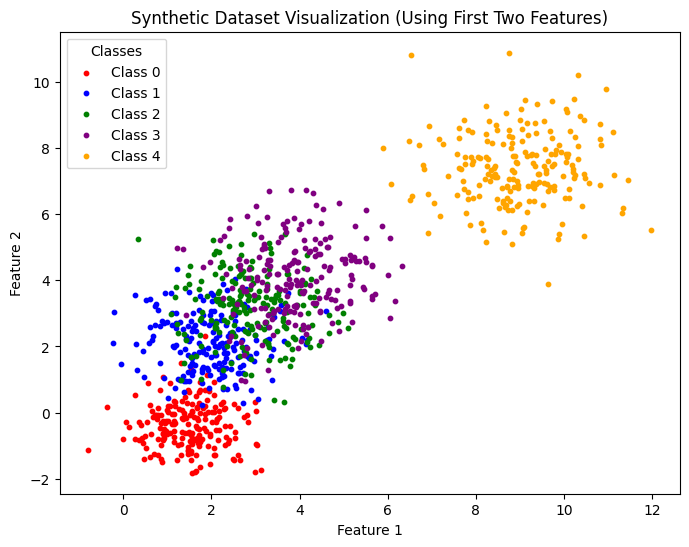

Training samples: 800
Testing samples: 200

Dataset prepared and normalized!

Class distribution in training set:
  Class 0: 158 samples (19.8%)
  Class 1: 158 samples (19.8%)
  Class 2: 165 samples (20.6%)
  Class 3: 169 samples (21.1%)
  Class 4: 150 samples (18.8%)


In [88]:
n_samples = 1000
n_features = 2
n_classes = 5

print("="*70)
print("GENERATING SYNTHETIC DATASET")
print("="*70)
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")
print(f"Number of classes: {n_classes}")
print()

# Generate dataset
X, y = generate_synthetic_dataset(n_samples, n_features, n_classes)

# Simple visualization using first two features
plt.figure(figsize=(8, 6))

colors = ["red", "blue", "green", "purple", "orange"]
classes = np.unique(y)

# Scatter plot with fixed colors
for c in classes:
    plt.scatter(X[y == c, 0], X[y == c, 1],
                color=colors[c], s=10, label=f"Class {c}")

plt.legend(title="Classes")

plt.title("Synthetic Dataset Visualization (Using First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training samples: {len(y_train)}")
print(f"Testing samples: {len(y_test)}")
print()

# Feature normalization (standardization)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0) + 1e-8
X_train_normalized = (X_train - mean) / std
X_test_normalized = (X_test - mean) / std

print("Dataset prepared and normalized!")

# Display class distribution
print("\nClass distribution in training set:")
for i in range(n_classes):
    count = np.sum(y_train == i)
    print(f"  Class {i}: {count} samples ({count/len(y_train)*100:.1f}%)")


In [89]:
# Network architecture
hidden1_size = 16
hidden2_size =8
hidden3_size = 4

# Training parameters
learning_rate = 0.01
epochs = 1000
batch_size = 32

print("="*70)
print("NEURAL NETWORK CONFIGURATION")
print("="*70)
print(f"Architecture: {n_features} -> {hidden1_size} -> {hidden2_size} -> {hidden3_size} -> {n_classes}")
print(f"Learning rate: {learning_rate}")
print(f"Epochs: {epochs}")
print(f"Batch size: {batch_size}")
print()

# Initialize neural network
nn = ThreeHiddenLayerNN(
    input_size=n_features,
    hidden1_size=hidden1_size,
    hidden2_size=hidden2_size,
    hidden3_size=hidden3_size,
    output_size=n_classes,
    learning_rate=learning_rate
)

print("Neural Network initialized successfully!")
print(f"Total parameters: {(n_features*hidden1_size + hidden1_size*hidden2_size + hidden2_size*hidden3_size + hidden3_size*n_classes + hidden1_size + hidden2_size + hidden3_size + n_classes)}")



NEURAL NETWORK CONFIGURATION
Architecture: 2 -> 16 -> 8 -> 4 -> 5
Learning rate: 0.01
Epochs: 1000
Batch size: 32

Neural Network initialized successfully!
Total parameters: 245


In [90]:
print("="*70)
print("TRAINING NEURAL NETWORK")
print("="*70)
print()

# Train the model
nn.train(X_train_normalized, y_train, epochs=epochs, batch_size=batch_size, verbose=True)

print("\nTraining completed!")

TRAINING NEURAL NETWORK



Training:   2%|▏         | 23/1000 [00:00<00:04, 221.43it/s]

Epoch 10/1000 - Loss: 1.4144 - Accuracy: 0.3962
Epoch 20/1000 - Loss: 1.1575 - Accuracy: 0.4300
Epoch 30/1000 - Loss: 0.9858 - Accuracy: 0.6675
Epoch 40/1000 - Loss: 0.8332 - Accuracy: 0.7937


Training:   5%|▍         | 47/1000 [00:00<00:04, 228.72it/s]

Epoch 50/1000 - Loss: 0.7173 - Accuracy: 0.7963


Training:   7%|▋         | 70/1000 [00:00<00:04, 220.12it/s]

Epoch 60/1000 - Loss: 0.6437 - Accuracy: 0.7987
Epoch 70/1000 - Loss: 0.5983 - Accuracy: 0.8025
Epoch 80/1000 - Loss: 0.5676 - Accuracy: 0.8013
Epoch 90/1000 - Loss: 0.5463 - Accuracy: 0.8050


Training:   9%|▉         | 93/1000 [00:00<00:04, 217.80it/s]

Epoch 100/1000 - Loss: 0.5318 - Accuracy: 0.8013


Training:  14%|█▍        | 142/1000 [00:00<00:03, 228.76it/s]

Epoch 110/1000 - Loss: 0.5198 - Accuracy: 0.8025
Epoch 120/1000 - Loss: 0.5097 - Accuracy: 0.7987
Epoch 130/1000 - Loss: 0.5028 - Accuracy: 0.7975
Epoch 140/1000 - Loss: 0.4961 - Accuracy: 0.8037
Epoch 150/1000 - Loss: 0.4921 - Accuracy: 0.8013


Training:  19%|█▉        | 191/1000 [00:00<00:03, 235.97it/s]

Epoch 160/1000 - Loss: 0.4883 - Accuracy: 0.7987
Epoch 170/1000 - Loss: 0.4847 - Accuracy: 0.8037
Epoch 180/1000 - Loss: 0.4815 - Accuracy: 0.8037
Epoch 190/1000 - Loss: 0.4775 - Accuracy: 0.7963
Epoch 200/1000 - Loss: 0.4756 - Accuracy: 0.8025


Training:  24%|██▍       | 241/1000 [00:01<00:03, 230.77it/s]

Epoch 210/1000 - Loss: 0.4735 - Accuracy: 0.8013
Epoch 220/1000 - Loss: 0.4720 - Accuracy: 0.8025
Epoch 230/1000 - Loss: 0.4706 - Accuracy: 0.8025
Epoch 240/1000 - Loss: 0.4682 - Accuracy: 0.8013
Epoch 250/1000 - Loss: 0.4675 - Accuracy: 0.8025


Training:  29%|██▉       | 290/1000 [00:01<00:03, 233.21it/s]

Epoch 260/1000 - Loss: 0.4669 - Accuracy: 0.8050
Epoch 270/1000 - Loss: 0.4652 - Accuracy: 0.8000
Epoch 280/1000 - Loss: 0.4627 - Accuracy: 0.8025
Epoch 290/1000 - Loss: 0.4654 - Accuracy: 0.8013
Epoch 300/1000 - Loss: 0.4603 - Accuracy: 0.8025


Training:  34%|███▍      | 339/1000 [00:01<00:02, 236.02it/s]

Epoch 310/1000 - Loss: 0.4596 - Accuracy: 0.8063
Epoch 320/1000 - Loss: 0.4621 - Accuracy: 0.8063
Epoch 330/1000 - Loss: 0.4592 - Accuracy: 0.8037
Epoch 340/1000 - Loss: 0.4576 - Accuracy: 0.8037
Epoch 350/1000 - Loss: 0.4576 - Accuracy: 0.8025


Training:  39%|███▉      | 388/1000 [00:01<00:02, 236.94it/s]

Epoch 360/1000 - Loss: 0.4581 - Accuracy: 0.8013
Epoch 370/1000 - Loss: 0.4560 - Accuracy: 0.8075
Epoch 380/1000 - Loss: 0.4563 - Accuracy: 0.8075
Epoch 390/1000 - Loss: 0.4551 - Accuracy: 0.8037
Epoch 400/1000 - Loss: 0.4553 - Accuracy: 0.8037


Training:  44%|████▎     | 437/1000 [00:01<00:02, 230.96it/s]

Epoch 410/1000 - Loss: 0.4545 - Accuracy: 0.8025
Epoch 420/1000 - Loss: 0.4549 - Accuracy: 0.8037
Epoch 430/1000 - Loss: 0.4530 - Accuracy: 0.8063
Epoch 440/1000 - Loss: 0.4540 - Accuracy: 0.8037
Epoch 450/1000 - Loss: 0.4537 - Accuracy: 0.8050


Training:  48%|████▊     | 484/1000 [00:02<00:02, 218.89it/s]

Epoch 460/1000 - Loss: 0.4527 - Accuracy: 0.8087
Epoch 470/1000 - Loss: 0.4527 - Accuracy: 0.8037
Epoch 480/1000 - Loss: 0.4533 - Accuracy: 0.8063
Epoch 490/1000 - Loss: 0.4523 - Accuracy: 0.8075
Epoch 500/1000 - Loss: 0.4513 - Accuracy: 0.8063


Training:  53%|█████▎    | 531/1000 [00:02<00:02, 226.05it/s]

Epoch 510/1000 - Loss: 0.4520 - Accuracy: 0.8075
Epoch 520/1000 - Loss: 0.4506 - Accuracy: 0.8063
Epoch 530/1000 - Loss: 0.4501 - Accuracy: 0.8100
Epoch 540/1000 - Loss: 0.4523 - Accuracy: 0.8050


Training:  55%|█████▌    | 554/1000 [00:02<00:01, 223.45it/s]

Epoch 550/1000 - Loss: 0.4510 - Accuracy: 0.8050


Training:  58%|█████▊    | 577/1000 [00:02<00:01, 222.56it/s]

Epoch 560/1000 - Loss: 0.4514 - Accuracy: 0.8050
Epoch 570/1000 - Loss: 0.4503 - Accuracy: 0.8013
Epoch 580/1000 - Loss: 0.4495 - Accuracy: 0.8025
Epoch 590/1000 - Loss: 0.4489 - Accuracy: 0.8013


Training:  60%|██████    | 600/1000 [00:02<00:01, 220.79it/s]

Epoch 600/1000 - Loss: 0.4492 - Accuracy: 0.8075


Training:  62%|██████▏   | 624/1000 [00:02<00:01, 225.46it/s]

Epoch 610/1000 - Loss: 0.4494 - Accuracy: 0.8013
Epoch 620/1000 - Loss: 0.4481 - Accuracy: 0.8050
Epoch 630/1000 - Loss: 0.4483 - Accuracy: 0.8050
Epoch 640/1000 - Loss: 0.4475 - Accuracy: 0.8050


Training:  65%|██████▍   | 648/1000 [00:02<00:01, 228.70it/s]

Epoch 650/1000 - Loss: 0.4474 - Accuracy: 0.8075


Training:  67%|██████▋   | 671/1000 [00:02<00:01, 217.29it/s]

Epoch 660/1000 - Loss: 0.4474 - Accuracy: 0.8075
Epoch 670/1000 - Loss: 0.4470 - Accuracy: 0.8063
Epoch 680/1000 - Loss: 0.4480 - Accuracy: 0.8075
Epoch 690/1000 - Loss: 0.4488 - Accuracy: 0.8087


Training:  70%|██████▉   | 695/1000 [00:03<00:01, 221.72it/s]

Epoch 700/1000 - Loss: 0.4465 - Accuracy: 0.8075


Training:  74%|███████▍  | 745/1000 [00:03<00:01, 233.65it/s]

Epoch 710/1000 - Loss: 0.4458 - Accuracy: 0.8075
Epoch 720/1000 - Loss: 0.4466 - Accuracy: 0.8050
Epoch 730/1000 - Loss: 0.4470 - Accuracy: 0.8113
Epoch 740/1000 - Loss: 0.4454 - Accuracy: 0.8113
Epoch 750/1000 - Loss: 0.4463 - Accuracy: 0.8037


Training:  79%|███████▉  | 794/1000 [00:03<00:00, 236.70it/s]

Epoch 760/1000 - Loss: 0.4477 - Accuracy: 0.8087
Epoch 770/1000 - Loss: 0.4448 - Accuracy: 0.8075
Epoch 780/1000 - Loss: 0.4468 - Accuracy: 0.8087
Epoch 790/1000 - Loss: 0.4452 - Accuracy: 0.8075
Epoch 800/1000 - Loss: 0.4449 - Accuracy: 0.8075


Training:  84%|████████▍ | 842/1000 [00:03<00:00, 228.52it/s]

Epoch 810/1000 - Loss: 0.4447 - Accuracy: 0.8113
Epoch 820/1000 - Loss: 0.4453 - Accuracy: 0.8063
Epoch 830/1000 - Loss: 0.4450 - Accuracy: 0.8100
Epoch 840/1000 - Loss: 0.4452 - Accuracy: 0.8050
Epoch 850/1000 - Loss: 0.4460 - Accuracy: 0.8013


Training:  89%|████████▉ | 890/1000 [00:03<00:00, 225.18it/s]

Epoch 860/1000 - Loss: 0.4447 - Accuracy: 0.8050
Epoch 870/1000 - Loss: 0.4442 - Accuracy: 0.8087
Epoch 880/1000 - Loss: 0.4444 - Accuracy: 0.8050
Epoch 890/1000 - Loss: 0.4454 - Accuracy: 0.8075
Epoch 900/1000 - Loss: 0.4451 - Accuracy: 0.8063


Training:  94%|█████████▍| 938/1000 [00:04<00:00, 223.35it/s]

Epoch 910/1000 - Loss: 0.4428 - Accuracy: 0.8100
Epoch 920/1000 - Loss: 0.4429 - Accuracy: 0.8037
Epoch 930/1000 - Loss: 0.4430 - Accuracy: 0.8087
Epoch 940/1000 - Loss: 0.4428 - Accuracy: 0.8075
Epoch 950/1000 - Loss: 0.4425 - Accuracy: 0.8100


Training:  99%|█████████▊| 987/1000 [00:04<00:00, 232.84it/s]

Epoch 960/1000 - Loss: 0.4423 - Accuracy: 0.8125
Epoch 970/1000 - Loss: 0.4421 - Accuracy: 0.8075
Epoch 980/1000 - Loss: 0.4418 - Accuracy: 0.8113
Epoch 990/1000 - Loss: 0.4431 - Accuracy: 0.8025


Training: 100%|██████████| 1000/1000 [00:04<00:00, 227.36it/s]

Epoch 1000/1000 - Loss: 0.4426 - Accuracy: 0.8087

Training completed!


In [91]:
print("="*70)
print("EVALUATING ON TEST SET")
print("="*70)
print()

# Make predictions
y_pred = nn.predict(X_test_normalized)

# Compute metrics
metrics, cm = compute_metrics(y_test, y_pred, n_classes)

# Display overall performance
print("OVERALL PERFORMANCE:")
print(f"  Accuracy:  {metrics['overall']['accuracy']:.4f}")
print(f"  Precision: {metrics['overall']['precision']:.4f}")
print(f"  Recall:    {metrics['overall']['recall']:.4f}")
print(f"  F1-Score:  {metrics['overall']['f1_score']:.4f}")
print()

# Display per-class metrics
print("PER-CLASS METRICS:")
for i in range(n_classes):
    m = metrics[f'class_{i}']
    print(f"  Class {i} - Precision: {m['precision']:.4f}, Recall: {m['recall']:.4f}, F1: {m['f1_score']:.4f}")
print()

# Display confusion matrix values
print("CONFUSION MATRIX:")
print(cm)


EVALUATING ON TEST SET

OVERALL PERFORMANCE:
  Accuracy:  0.8400
  Precision: 0.8283
  Recall:    0.8246
  F1-Score:  0.8258

PER-CLASS METRICS:
  Class 0 - Precision: 0.9512, Recall: 0.9286, F1: 0.9398
  Class 1 - Precision: 0.7561, Recall: 0.7381, F1: 0.7470
  Class 2 - Precision: 0.6410, Recall: 0.7143, F1: 0.6757
  Class 3 - Precision: 0.7931, Recall: 0.7419, F1: 0.7667
  Class 4 - Precision: 1.0000, Recall: 1.0000, F1: 1.0000

CONFUSION MATRIX:
[[39  3  0  0  0]
 [ 2 31  7  2  0]
 [ 0  6 25  4  0]
 [ 0  1  7 23  0]
 [ 0  0  0  0 50]]


TRAINING HISTORY VISUALIZATION


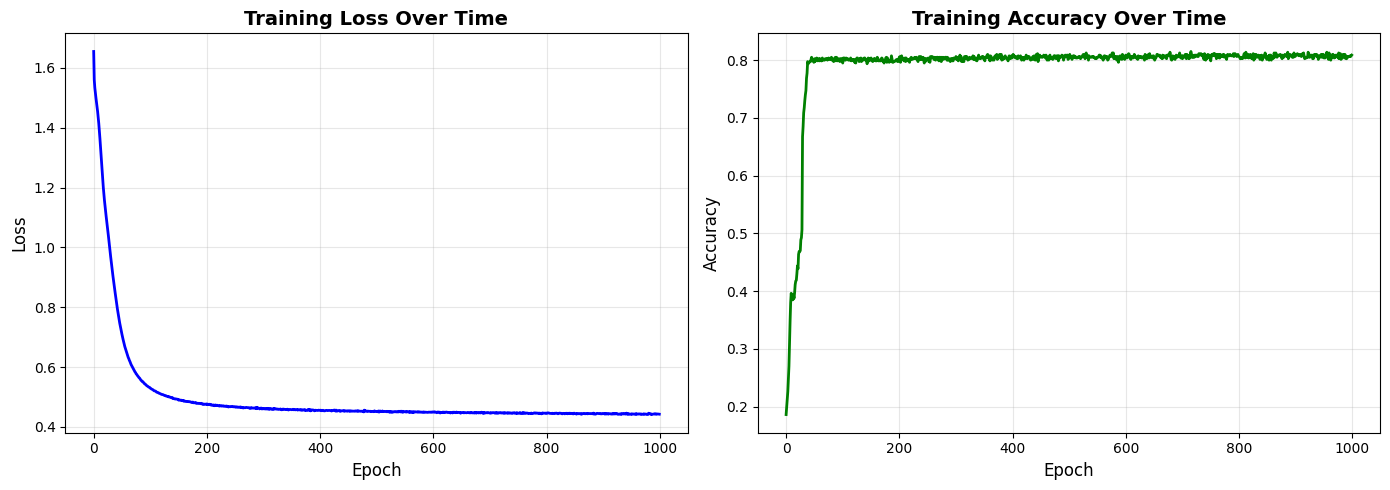

In [92]:
print("="*70)
print("TRAINING HISTORY VISUALIZATION")
print("="*70)

plot_training_history(nn)

CONFUSION MATRIX VISUALIZATION


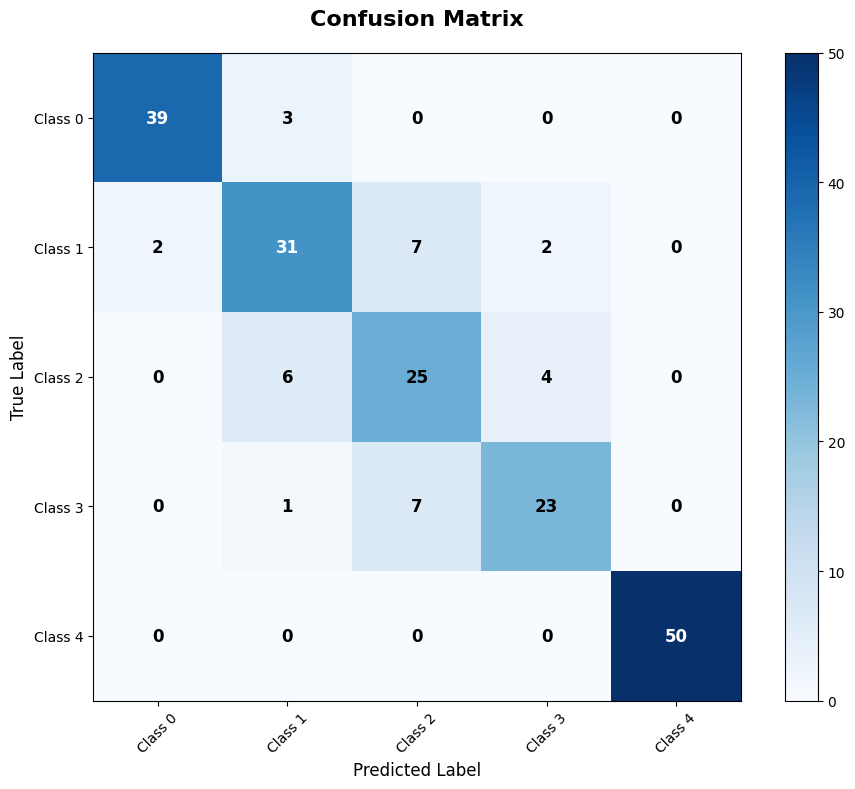

In [93]:
print("="*70)
print("CONFUSION MATRIX VISUALIZATION")
print("="*70)

plot_confusion_matrix(cm, n_classes)

PERFORMANCE METRICS COMPARISON


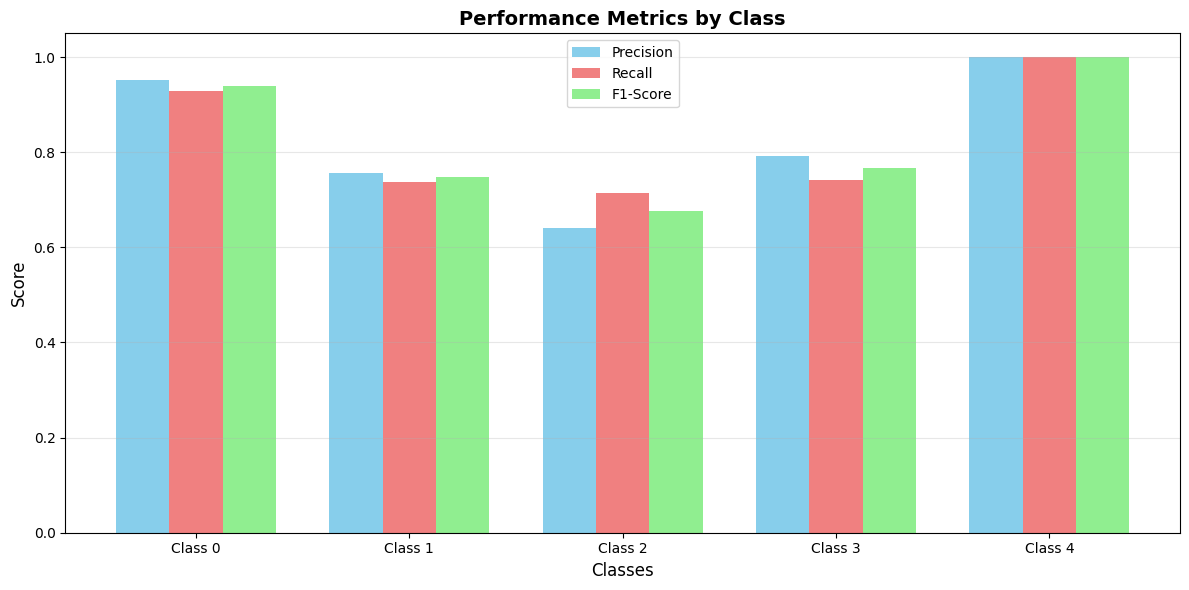

In [94]:
print("="*70)
print("PERFORMANCE METRICS COMPARISON")
print("="*70)

plot_metrics_comparison(metrics, n_classes)

In [95]:
print("="*70)
print("ADDITIONAL ANALYSIS")
print("="*70)
print()

# Test on individual samples
print("Sample predictions (first 10 test samples):")
sample_probs = nn.predict_proba(X_test_normalized[:10])
for i in range(10):
    print(f"Sample {i}: True={y_test[i]}, Predicted={y_pred[i]}, Probabilities={sample_probs[i].round(3)}")

ADDITIONAL ANALYSIS

Sample predictions (first 10 test samples):
Sample 0: True=4, Predicted=4, Probabilities=[0. 0. 0. 0. 1.]
Sample 1: True=3, Predicted=2, Probabilities=[0.    0.377 0.522 0.1   0.   ]
Sample 2: True=4, Predicted=4, Probabilities=[0. 0. 0. 0. 1.]
Sample 3: True=2, Predicted=2, Probabilities=[0.    0.463 0.506 0.031 0.   ]
Sample 4: True=0, Predicted=0, Probabilities=[0.979 0.007 0.004 0.007 0.004]
Sample 5: True=0, Predicted=0, Probabilities=[0.777 0.185 0.024 0.007 0.006]
Sample 6: True=1, Predicted=1, Probabilities=[0.058 0.79  0.132 0.018 0.001]
Sample 7: True=4, Predicted=4, Probabilities=[0. 0. 0. 0. 1.]
Sample 8: True=3, Predicted=3, Probabilities=[0.    0.003 0.157 0.84  0.   ]
Sample 9: True=2, Predicted=2, Probabilities=[0.    0.099 0.642 0.259 0.   ]


### Discussion
*   The synthetic dataset consists of 1000 samples, with 2 features and 5 distinct classes. It was split into 800 training samples and 200 testing samples.
*   The neural network architecture comprises three hidden layers: Input (2 features) -> Hidden 1 (16 neurons) -> Hidden 2 (8 neurons) -> Hidden 3 (4 neurons) -> Output (5 neurons). ReLU activation was used for hidden layers and Softmax for the output, with He initialization for weights.
*   Training was conducted for 1000 epochs using a learning rate of 0.01 and a batch size of 32. The final training loss was 0.4426, with a training accuracy of 0.8087.
*   The model achieved a test set accuracy of 0.8400, with an overall macro-averaged precision of 0.8283, recall of 0.8246, and F1-score of 0.8258.
*   Performance varied across classes: Classes 0 and 4 showed excellent performance (F1-scores of 0.9398 and 1.0000, respectively), while Classes 1, 2, and 3 exhibited lower F1-scores (0.7470, 0.6757, and 0.7667, respectively).
*   The confusion matrix revealed significant misclassifications and overlap primarily among Classes 1, 2, and 3 (e.g., Class 2 was confused with Class 1 (6 samples) and Class 3 (4 samples)).
*   The test accuracy (0.8400) being slightly higher than the training accuracy (0.8087) indicates good generalization and no apparent overfitting on this dataset, possibly suggesting slight underfitting or a relatively 'easier' test set.
